In [115]:
import pandas as pd
import numpy as np
from numpy import loadtxt

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Split data into train and test
from sklearn.model_selection import train_test_split

# Linear Model
from sklearn.linear_model import LogisticRegression

#XGBoost Model
import xgboost as xgb
from xgboost import XGBClassifier

#Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Comparison metric of models
from sklearn.metrics import accuracy_score


import os
os.chdir('C:/Users/pooja/Desktop/Python/Data/')

This dataset is available on kaggle: https://www.kaggle.com/c/instacart-market-basket-analysis/data

In [129]:
aisles=pd.read_csv('aisles.csv')
dep=pd.read_csv('departments.csv')
order_prod_prior=pd.read_csv('order_products__prior.csv')
order_prod_train=pd.read_csv('order_products__train.csv')
order=pd.read_csv('orders.csv')
prod=pd.read_csv('products.csv')

In [3]:
print(aisles.shape)
aisles.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


__Instacart has total 134 aisles for its products__

In [4]:
print(dep.shape)
dep.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


__There are 134 departments__

In [118]:
print(prod.shape)
prod.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


__Instacart offers 49,688 products__

In [5]:
print(order_prod_prior.shape)
order_prod_prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [120]:
print(order_prod_prior.order_id.nunique())

3214874


__3.2 million orders have been placed before the current order__

In [124]:
print(order.shape)
order.head()

(3421083, 6)


,order_id,user_id,eval_set,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,2,8,NaN
1,2398795,1,prior,3,7,15.0
2,473747,1,prior,3,12,21.0
3,2254736,1,prior,4,7,29.0
4,431534,1,prior,4,15,28.0


In [8]:
order.order_number.describe().apply(lambda x: format(x, '.2f'))

count    3421083.00
mean          17.15
std           17.73
min            1.00
25%            5.00
50%           11.00
75%           23.00
max          100.00
Name: order_number, dtype: object

__Minimum order quantity of products is 1 while maximum is 100__

In [123]:
print(order_prod_train.shape)
print(order_prod_train.order_id.nunique())
order_prod_train.head()

(1384617, 4)
131209


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


__The training data consists of 131209 orders__

In [130]:
order_number = order.groupby('user_id')['order_number'].max()
order_number=order_number.value_counts()

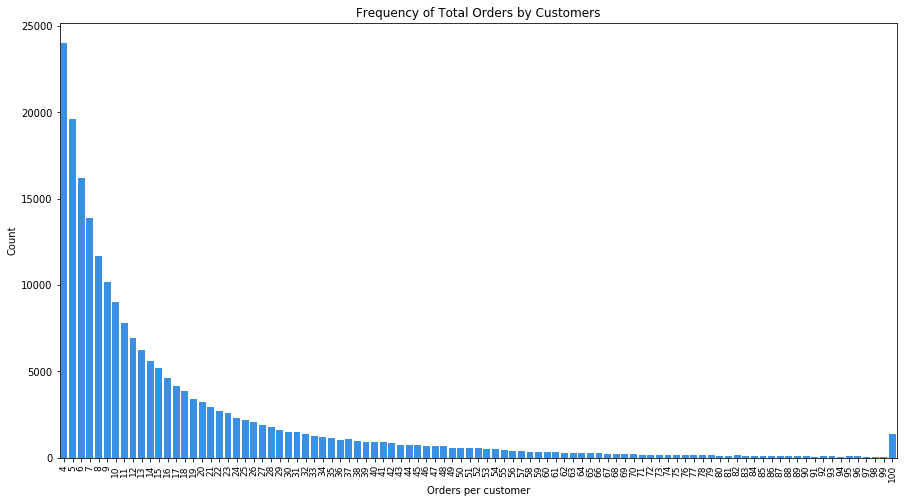

In [131]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x = order_number.index, y = order_number.values,color="dodgerblue");
ax.set_xlabel('Orders per customer');
ax.set_ylabel('Count');
ax.xaxis.set_tick_params(rotation=90, labelsize=9);
ax.set_title('Frequency of Total Orders by Customers');

__The maximum order per customer ranges from 4 to 100__

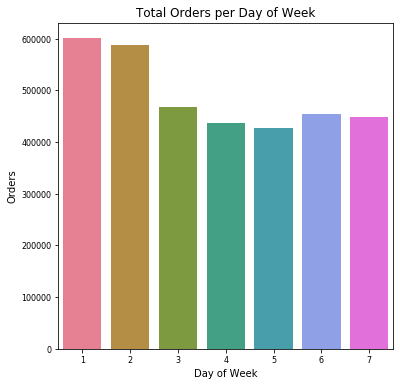

In [14]:
fig, ax = plt.subplots(figsize = (6,6))
order['dow_corrected']=order.order_dow+1
ax = sns.countplot(order.dow_corrected,palette="husl")
ax.set_xlabel('Day of Week', size = 10)
ax.set_ylabel('Orders', size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
ax.set_title('Total Orders per Day of Week')
fig.savefig('Total Orders per Day of Week.png')
plt.show()

__First and second day of the week has highest number of orders__

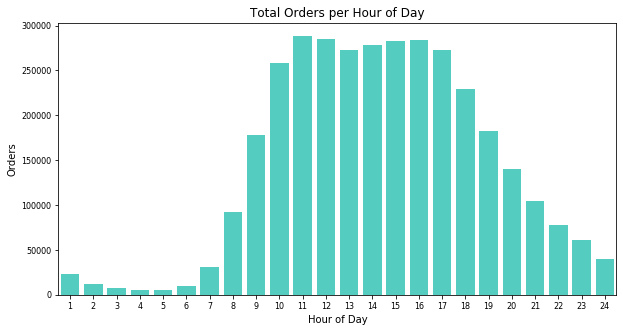

In [16]:
fig, ax = plt.subplots(figsize = (10,5))
order['hour_corrected']=order.order_hour_of_day+1
ax = sns.countplot(order.hour_corrected, color = 'turquoise')
ax.set_xlabel('Hour of Day', size = 10 )
ax.set_ylabel('Orders', size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
ax.set_title('Total Orders per Hour of Day')
fig.savefig('Total Orders per Hour of Day.png')
plt.show()

__10 AM to 6 PM is the time when maximum orders are placed__

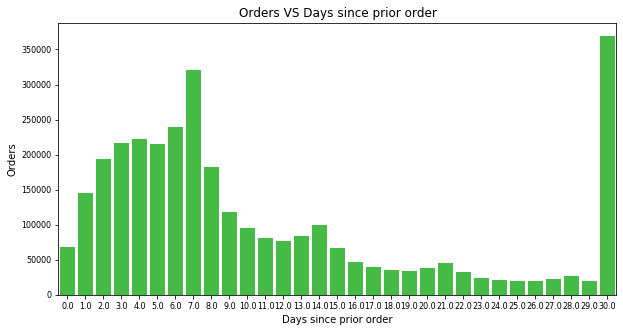

In [102]:
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.countplot(order.days_since_prior_order, color = 'limegreen')
ax.set_xlabel('Days since prior order', size = 10)
ax.set_ylabel('Orders', size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
ax.set_title('Orders VS Days since prior order')
fig.savefig('Orders VS Days since prior order.png')
plt.show()

__Users prefer to reorder after a month or a week__

In [132]:
heatmap_df = order.groupby(["order_dow", "order_hour_of_day"])["order_number"].agg("count").reset_index()
heatmap_df = heatmap_df.pivot(index='order_dow', columns='order_hour_of_day', values='order_number')

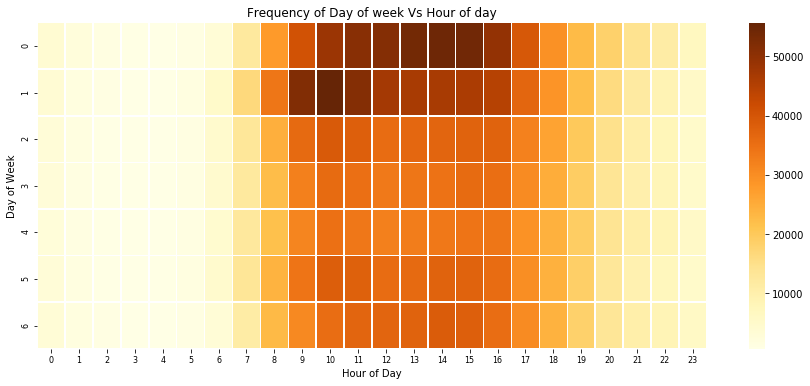

In [111]:
ax = plt.subplots(figsize=(15,6))
ax = sns.heatmap(heatmap_df, cmap="YlOrBr", linewidths=.5)
ax.set_title("Frequency of Day of week Vs Hour of day", size = 12)
ax.set_xlabel("Hour of Day", size = 10)
ax.set_ylabel("Day of Week", size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
fig = ax.get_figure()
plt.show()

__User preference to order is clearly highlighted in the heatma above__

In [59]:
order_prod_prior = pd.merge(order_prod_prior, prod, on='product_id', how='left')
order_prod_prior = pd.merge(order_prod_prior, aisles, on='aisle_id', how='left')
#order_prod_prior = pd.merge(order_prod_prior, dep, on='department_id', how='left')
order_prod_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients


In [22]:
cnt_srs = order_prod_prior['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']

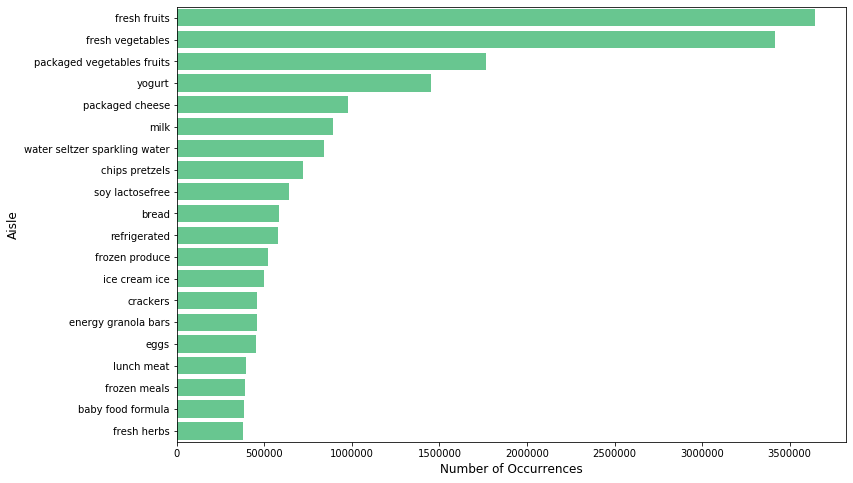

In [39]:
cnt_srs = order_prod_prior['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot( cnt_srs.values,cnt_srs.index, alpha=0.8,orient='h',color="#2ecc71")# palette="muted")
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('Aisle', fontsize=12)
#plt.xticks(rotation='vertical')
plt.show()

__Fresh fruits and vegetables are ordered the most__

In [30]:
order_all_prod = pd.concat([order_prod_train, order_prod_prior], axis=0)

print("The order_all_products size is : ", order_all_prod.shape)
order_all_prod.head()

The order_all_products size is :  (33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [31]:
total = order_all_prod.isnull().sum().sort_values(ascending=False)
percent = (order_all_prod.isnull().sum()/order_all_prod.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])
missing_data

,Total Missing,Percent
reordered,0,0.0
add_to_cart_order,0,0.0
product_id,0,0.0
order_id,0,0.0


There is no missing data.

In [32]:
grouped = order_all_prod.groupby('reordered')['product_id'].aggregate(Total_products= 'count').reset_index()
grouped['Ratios'] = grouped["Total_products"].apply(lambda x: x /grouped['Total_products'].sum())
grouped

,reordered,Total_products,Ratios
0,0,13863746,0.409938
1,1,19955360,0.590062


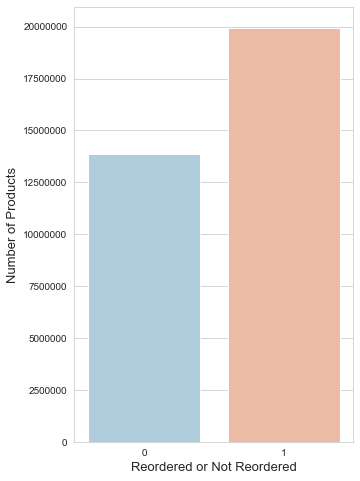

In [33]:
grouped  = grouped.groupby(['reordered']).sum()['Total_products'].sort_values(ascending=False)

sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(5, 8))
sns.barplot(grouped.index, grouped.values, palette='RdBu_r')
plt.ylabel('Number of Products', fontsize=13)
plt.xlabel('Reordered or Not Reordered', fontsize=13)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

__60% of products were reordered__

In [3]:
# merge with the orders file to get the user_id
prior_df = pd.merge(order_prod_prior, order, how="inner", on="order_id")
prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [4]:
# get the products and reorder status of the latest purchase of each user
prior_grouped_df = prior_df.groupby("user_id")["order_number"].aggregate("max").reset_index()
prior_df_latest = pd.merge(prior_df, prior_grouped_df, how="inner", on=["user_id", "order_number"])
prior_df_latest = prior_df_latest[["user_id", "product_id", "reordered"]]
prior_df_latest.columns = ["user_id", "product_id", "reordered_latest"]
prior_df_latest.head()

,user_id,product_id,reordered_latest
0,59897,9755,1
1,59897,31487,0
2,59897,37510,1
3,59897,14576,1
4,59897,22105,0


In [5]:
# get the count of each product and number of reorders by the customer
prior_df_agg = prior_df.groupby(["user_id","product_id"])["reordered"].aggregate(["count", "sum"]).reset_index()
prior_df_agg.columns = ["user_id", "product_id", "reordered_count", "reordered_sum"]
prior_df_agg.head()

,user_id,product_id,reordered_count,reordered_sum
0,1,196,10,9
1,1,10258,9,8
2,1,10326,1,0
3,1,12427,10,9
4,1,13032,3,2


In [32]:
prior_df_merge = pd.merge(prior_df_agg, prior_df_latest, how="left", on=["user_id","product_id"])
prior_df_merge.head()

,user_id,product_id,reordered_count,reordered_sum,reordered_latest
0,1,196,10,9,1.0
1,1,10258,9,8,1.0
2,1,10326,1,0,NaN
3,1,12427,10,9,1.0
4,1,13032,3,2,1.0


In [34]:
order.drop(["order_number"],axis=1,inplace=True)

__Create training data set__

In [66]:
#create features in train set
train_df = pd.read_csv("order_products__train.csv", usecols=["order_id"])

#count products in an order
train_df=train_df.groupby("order_id").aggregate("count").reset_index()

#Associate an order with user id
train_df = pd.merge(train_df, order[["order_id",'user_id']], how="inner", on="order_id")

#Bring in reorder count reorder sum and latest reorder
train_df = pd.merge(train_df, prior_df_merge, how="inner", on="user_id")

#Associate aisle_id and department_id
train_df = pd.merge(train_df, prod[["product_id",'aisle_id','department_id']], how="inner", on="product_id")


train_y_df = pd.merge(order_prod_train, order, how="inner", on="order_id")
train_y_df = train_y_df[["user_id", "product_id", "reordered"]]
train_df = pd.merge(train_df, train_y_df, how="left", on=["user_id", "product_id"])
train_df["reordered"].fillna(0, inplace=True)
print(train_df.shape)
train_df.head()

(8474661, 9)


,order_id,user_id,product_id,reordered_count,reordered_sum,reordered_latest,aisle_id,department_id,reordered
0,1,112108,2067,1,0,NaN,3,19,0.0
1,96,17227,2067,1,0,NaN,3,19,0.0
2,3243,206024,2067,1,0,NaN,3,19,0.0
3,12950,11456,2067,1,0,0.0,3,19,0.0
4,17683,177724,2067,1,0,NaN,3,19,0.0


__Create test data set__

In [64]:
#create test data set
test_sample=pd.read_csv('sample_submission.csv', usecols=["order_id"])

#Associate user id
test_df = pd.merge(test_sample, order[["order_id","user_id"]], how="inner", on="order_id")

#Bring in reorder count reorder sum and latest reorder
test_df = pd.merge(test_df, prior_df_merge, how="inner", on="user_id")
test_df = pd.merge(test_df, prod[["product_id",'aisle_id','department_id']], how="inner", on="product_id")
test_df.head()

,order_id,user_id,product_id,reordered_count,reordered_sum,reordered_latest,aisle_id,department_id
0,17,36855,1283,1,0,NaN,100,21
1,657743,16994,1283,1,0,NaN,100,21
2,834223,92628,1283,1,0,NaN,100,21
3,1446886,75870,1283,1,0,NaN,100,21
4,1518981,118458,1283,3,2,NaN,100,21


In [67]:
print(train_df.shape, test_df.shape)

(8474661, 9) (4833292, 8)


__Split data into train and test set__

In [69]:
X=train_df.drop('reordered',axis=1)
y=train_df['reordered']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

__We will explore a linear model - Logistic Regression__<br>
__Further, we will fir non linear models - XGBoost and Random Forest__

### Logistic Regression Model

In [96]:
#Logistic Regression model
log=(LogisticRegression(C=0.02))

#fitting the model
log.fit(X_train, y_train)

LogisticRegression(C=0.02, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
#predictions
pred=log.predict(X_test)

#accuracy score of Logistic Regression Model
accuracy = accuracy_score(pred, y_test)
print("Logistic Regression model has accuracy of %.2f%%" % (accuracy * 100.0))

Logistic Regression model has accuracy of 90.20%


### Random Forest Model

In [133]:
rf = RandomForestClassifier(max_features="log2", max_depth=6, n_estimators=24,min_samples_split=500, oob_score=True)
rf.fit(X_train,y_train)

C:\Users\pooja\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\pooja\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, n_estimators=24,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [125]:
#predictions
pred_rf=rf.predict(X_test)

#accuracy score of Logistic Regression Model
accuracy_rf = accuracy_score(pred_rf, y_test)
print("Random Forest model has accuracy of %.2f%%" % (accuracy_rf * 100.0))

Random Forest model has accuracy of 90.45%


### XGBoost Model

In [70]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

[17:10:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\gbm\gbtree.cc:138: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


In [71]:
predictions = [round(value) for value in y_pred]

In [99]:
accuracy = accuracy_score(y_test, predictions)
print("XGBoost model has accuracy of %.2f%%" % (accuracy * 100.0))

XGBoost model has accuracy of 90.47%


__XGBoost has the maximum accuracy of 90.47%. Hece, we will use this model for prediction of next basket for a given user.__

In [79]:
# target variable for train set
train_y = train_df.reordered.values

# dataframe for test set predictions
out_df = test_df[["order_id", "product_id"]]

# drop the unnecessary columns
train_df = np.array(train_df.drop(["order_id", "user_id", "reordered"], axis=1))
test_df = np.array(test_df.drop(["order_id", "user_id"], axis=1))
print(train_df.shape, test_df.shape)

(8474661, 6) (4833292, 6)


In [75]:
def runXGB(train_X, train_y, test_X, test_y=None, feature_names=None, seed_val=0):
        params = {}
        params["objective"] = "binary:logistic"
        params['eval_metric'] = 'logloss'
        params["eta"] = 0.05
        params["subsample"] = 0.7
        params["min_child_weight"] = 10
        params["colsample_bytree"] = 0.7
        params["max_depth"] = 8
        params["silent"] = 1
        params["seed"] = seed_val
        num_rounds = 100
        plst = list(params.items())
        xgtrain = xgb.DMatrix(train_X, label=train_y)

        if test_y is not None:
                xgtest = xgb.DMatrix(test_X, label=test_y)
                watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
                model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=50, verbose_eval=10)
        else:
                xgtest = xgb.DMatrix(test_X)
                model = xgb.train(plst, xgtrain, num_rounds)

        pred_test_y = model.predict(xgtest)
        return pred_test_y

In [137]:
# run the xgboost model
pred = runXGB(train_df, train_y, test_df)

# use a cut-off value to get the predictions
cutoff = 0.2
pred[pred>=cutoff] = 1
pred[pred<cutoff] = 0
out_df["Pred"] = pred
out_df = out_df.loc[out_df["Pred"].astype('int')==1]

In [138]:
out_df

,order_id,products
0,17,13107 21463
1,34,47766 2596 13176 16083 39180 39475 44632 44663...
2,137,5134 2326 23794 24852 25890 29594 41787
3,182,21903 39275 9337 27104 5479 13629 32109 33000 ...
4,257,39475 24852 27104 49235 27966 29837 30233 3573...
...,...,...
70662,3420740,39275 39928 13176 16797 35951 47209 28476 1158...
70663,3420877,21903 13176 21137 47209 8277 27966 27845 43122...
70664,3420888,44632 35951 46906 43961 20542 10880
70665,3420989,47766 5134 21616 46676 42450 47229 35004 43210


In [90]:
# when there are more than 1 product, merge them to a single string #
def merge_products(x):
    return " ".join(list(x.astype('str')))
out_df = out_df.groupby("order_id")["product_id"].aggregate(merge_products).reset_index()
out_df.columns = ["order_id", "products"]

In [91]:
# read the sample csv file and populate the products from predictions #
sub_df = pd.read_csv("sample_submission.csv", usecols=["order_id"])
sub_df = pd.merge(sub_df, out_df, how="left", on="order_id")

# when there are no predictions use "None" #
sub_df["products"].fillna("None", inplace=True)
sub_df.to_csv("xgb_starter_v1.csv", index=False)

In [154]:
maxlen = max(list(map(lambda x: len(x.split(" ")) ,sub_df.products))) # find max length in 'prod' column
cols = ["prod"+str(x)   for x in range(maxlen)]      # create new column names
datalist = list(map(lambda x: x.split(" "), sub_df.products)) # create list from entries in "prod" 
newdf = pd.DataFrame(data=datalist, columns=cols)   # create dataframe of new columns
newdf = pd.concat([sub_df, newdf], axis=1)              # add it to original dataframe
newdf.head()
newdf.drop(['products'],1,inplace=True).head()

,order_id,prod0,prod1,prod2,prod3,prod4,prod5,prod6,prod7,prod8,...,prod121,prod122,prod123,prod124,prod125,prod126,prod127,prod128,prod129,prod130
0,17,13107,21463,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,34,47766,2596,13176,16083,39180,39475,44632,44663,47792,...,None,None,None,None,None,None,None,None,None,None
2,137,5134,2326,23794,24852,25890,29594,41787,None,None,...,None,None,None,None,None,None,None,None,None,None
3,182,21903,39275,9337,27104,5479,13629,32109,33000,35951,...,None,None,None,None,None,None,None,None,None,None
4,257,39475,24852,27104,49235,27966,29837,30233,35734,37646,...,None,None,None,None,None,None,None,None,None,None


In [179]:
predicted_df=newdf.melt(id_vars=["order_id"], var_name="Prod#", value_name="product_id")
predicted_df = predicted_df[predicted_df.product_id.notnull()]
predicted_df.drop('Prod#',1,inplace=True)

predicted_df = predicted_df.replace(to_replace='None', value=np.nan).dropna()
predicted_df['product_id']=predicted_df['product_id'].astype('int')
predicted_df=predicted_df.sort_values('order_id')

In [183]:
predicted=pd.merge(predicted_df,prod,how='left')
predicted=pd.merge(predicted,aisles,how='left')
predicted=pd.merge(predicted,dep,how='left')
predicted=predicted[['order_id', 'product_name', 'aisle', 'department']]
predicted.head()

,order_id,product_name,aisle,department
0,17,The Complete Cookie Double Chocolate,energy granola bars,snacks
1,17,Vanilla Bean Light Ice Cream,ice cream ice,frozen
2,34,Bag of Organic Bananas,fresh fruits,produce
3,34,Organic Large Brown Eggs,eggs,dairy eggs
4,34,Organic Lowfat 1% Milk,milk,dairy eggs


### __The prediction of products in the basket of order id 34 as shown in the table below:__

In [185]:
predicted[predicted.order_id==34]

,order_id,product_name,aisle,department
2,34,Bag of Organic Bananas,fresh fruits,produce
3,34,Organic Large Brown Eggs,eggs,dairy eggs
4,34,Organic Lowfat 1% Milk,milk,dairy eggs
5,34,Total Greek Strained Yogurt,yogurt,dairy eggs
6,34,Sparkling Water Grapefruit,water seltzer sparkling water,beverages
7,34,Naturals Lite Goddess Dressing,salad dressing toppings,pantry
8,34,Organic Avocado,fresh fruits,produce
9,34,Lemon Cake Ice Cream,ice cream ice,frozen
10,34,Organic Beans & Rice Cheddar Cheese Burrito,frozen meals,frozen
11,34,Cran Raspberry Sparkling Water,water seltzer sparkling water,beverages
